In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import cohen_kappa_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading data
data = pd.read_csv('customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
inputData = data[['tenure', 'SeniorCitizen', 'MonthlyCharges']]

In [6]:
target=data[['Churn']]  #we want to predict

In [7]:
target.shape

(7043, 1)

In [8]:
inputData.head()

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70


In [9]:
target.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


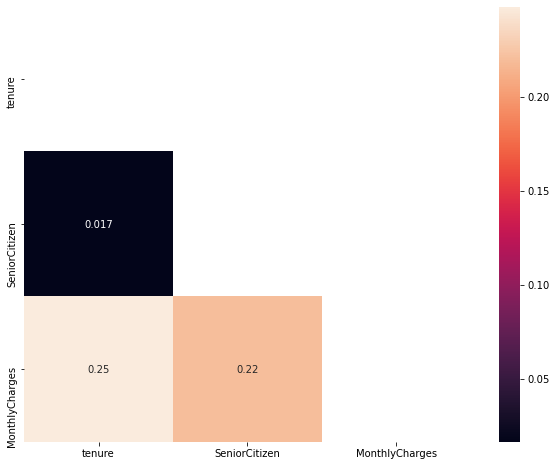

In [10]:
correlations_matrix = inputData.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()


In [11]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [12]:
data['Contract'].value_counts() #we might use it

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [13]:
data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [14]:
data['Partner'].value_counts() # we might use it

No     3641
Yes    3402
Name: Partner, dtype: int64

In [15]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [16]:
data['TechSupport'].value_counts() #we can keep it 

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

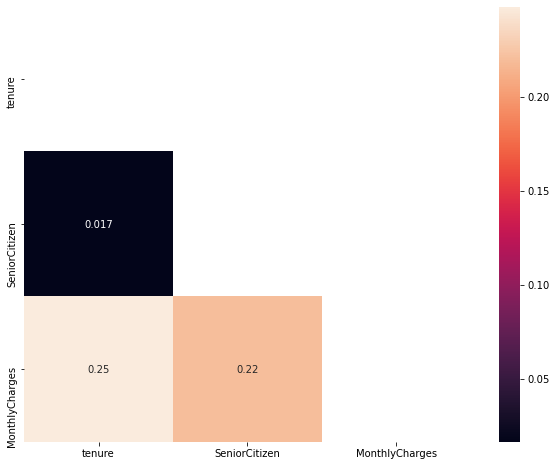

In [17]:
correlations_matrix = inputData.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [18]:
inputData.shape

(7043, 3)

In [19]:
inputData.describe()

,tenure,SeniorCitizen,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,0.162147,64.761692
std,24.559481,0.368612,30.090047
min,0.000000,0.000000,18.250000
25%,9.000000,0.000000,35.500000
50%,29.000000,0.000000,70.350000
75%,55.000000,0.000000,89.850000
max,72.000000,1.000000,118.750000


In [20]:
contract_dict = {'Month-to-month':1, 'One year':2, 'Two year':3}
data['Contract'] = data['Contract'].map(contract_dict)


In [21]:
def change_partner(x):
    if ['Yes']:
        x=1
    else:
        x=0
    return x 


In [22]:
data['Partner']=list(map(change_partner, data['Partner']))

In [24]:
inputData = data[['tenure', 'SeniorCitizen','MonthlyCharges',"Partner","Contract"]]

In [25]:
# "Partner","Contract"

In [26]:
inputData.shape

(7043, 5)

In [27]:
data=change_partner(data)

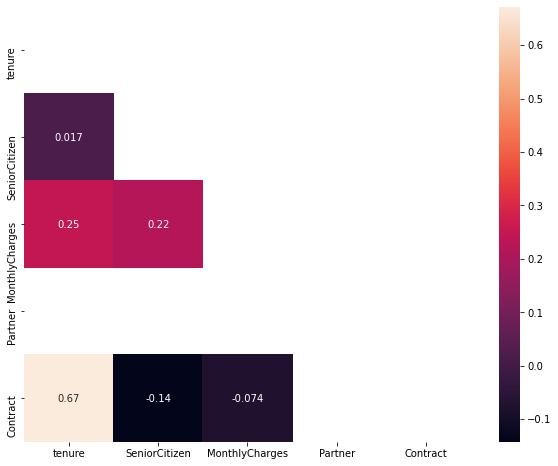

In [28]:
correlations_matrix = inputData.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [29]:
inputData.describe()

,tenure,SeniorCitizen,MonthlyCharges,Partner,Contract
count,7043.000000,7043.000000,7043.000000,7043.0,7043.000000
mean,32.371149,0.162147,64.761692,1.0,1.690473
std,24.559481,0.368612,30.090047,0.0,0.833755
min,0.000000,0.000000,18.250000,1.0,1.000000
25%,9.000000,0.000000,35.500000,1.0,1.000000
50%,29.000000,0.000000,70.350000,1.0,1.000000
75%,55.000000,0.000000,89.850000,1.0,2.000000
max,72.000000,1.000000,118.750000,1.0,3.000000


In [30]:
transformer = StandardScaler().fit(inputData)
scaled_x = transformer.transform(inputData)

In [31]:
pd.DataFrame(scaled_x).head()

,0,1,2,3,4
0,-1.277445,-0.439916,-1.160323,0.0,-0.828207
1,0.066327,-0.439916,-0.259629,0.0,0.371271
2,-1.236724,-0.439916,-0.362660,0.0,-0.828207
3,0.514251,-0.439916,-0.746535,0.0,0.371271
4,-1.236724,-0.439916,0.197365,0.0,-0.828207


In [32]:
Y= target

In [33]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(scaled_x, target)
                        
print("The accuracy is: ",round(classification.score(scaled_x, target),2))

The accuracy is:  0.79


In [34]:
print("The kappa of the model is: ",round(cohen_kappa_score(target,classification.predict(scaled_x)),2))

The kappa of the model is:  0.43


In [35]:
#downsampling

In [36]:
rus = RandomUnderSampler()


X_rus, y_rus = rus.fit_sample(scaled_x, Y)

In [37]:
pd.DataFrame(y_rus).value_counts()

Churn
Yes      1869
No       1869
dtype: int64

In [38]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_rus, y_rus)
                        
print("The accuracy of the model is: ",round(classification.score(X_rus, y_rus),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_rus,classification.predict(X_rus)),2))

The accuracy of the model is:  0.75
The kappa of the model is:  0.51


In [39]:
#upsampling

In [40]:
ros = RandomOverSampler()

In [41]:
X_ros, y_ros = ros.fit_sample(scaled_x, Y)

In [42]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_ros, y_ros)
                        
print("The accuracy of the model is: ",round(classification.score(X_ros, y_ros),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_ros,classification.predict(X_ros)),2))

The accuracy of the model is:  0.75
The kappa of the model is:  0.5


In [43]:
y_ros.value_counts()

Churn
Yes      5174
No       5174
dtype: int64

In [44]:
#Smote

In [45]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_sm, y_sm = smote.fit_sample(scaled_x, Y)
pd.DataFrame(y_sm).value_counts()

Churn
Yes      5174
No       5174
dtype: int64

In [46]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_sm, y_sm)
                        
print("The accuracy of the model is: ",round(classification.score(X_sm, y_sm),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_sm,classification.predict(X_sm)),2))

The accuracy of the model is:  0.76
The kappa of the model is:  0.51


In [47]:
#Tomek

In [48]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')

X_tl, y_tl = tl.fit_sample(scaled_x, Y)
pd.DataFrame(y_tl).value_counts()

Churn
No       4679
Yes      1869
dtype: int64

In [49]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_tl, y_tl)
                        
print("The accuracy of the model is: ",round(classification.score(X_tl, y_tl),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_tl,classification.predict(X_tl)),2))

The accuracy of the model is:  0.79
The kappa of the model is:  0.47


In [50]:
#Smote again

In [51]:
X_sm1, y_sm1 = smote.fit_sample(X_tl,y_tl)
pd.DataFrame(y_sm1).value_counts()

Churn
Yes      4679
No       4679
dtype: int64

In [52]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_sm1, y_sm1)
                        
print("The accuracy of the model is: ",round(classification.score(X_sm1, y_sm1),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_sm1,classification.predict(X_sm1)),2))

The accuracy of the model is:  0.77
The kappa of the model is:  0.55
